## SVM

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

data_df = pd.read_csv('titanic.csv')

y_data = data_df[['Survived']]
y_data.head(3)


del data_df['Survived']
x_data = data_df.copy()

# 성별 male/female 0/1
x_data['Sex'] = x_data['Sex'].apply(lambda x: 0 if x == 'male' else 1 )

# # 기본적인 결측치 채우는 방법
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)
x_data

list1 = ["Name", "Fare",'Ticket','Embarked','PassengerId','Cabin']

x_data.drop(labels = list1, axis = 1, inplace = True)


x_data.loc[ x_data['Age'] <= 10, 'Age_group'] = 0
x_data.loc[(x_data['Age'] > 10) & (x_data['Age'] <= 16), 'Age_group'] = 1
x_data.loc[(x_data['Age'] > 16) & (x_data['Age'] <= 20), 'Age_group'] = 2
x_data.loc[(x_data['Age'] > 20) & (x_data['Age'] <= 26), 'Age_group'] = 3
x_data.loc[(x_data['Age'] > 26) & (x_data['Age'] <= 30), 'Age_group'] = 4
x_data.loc[(x_data['Age'] > 30) & (x_data['Age'] <= 36), 'Age_group'] = 5
x_data.loc[(x_data['Age'] > 36) & (x_data['Age'] <= 40), 'Age_group'] = 6
x_data.loc[(x_data['Age'] > 40) & (x_data['Age'] <= 46), 'Age_group'] = 7
x_data.loc[(x_data['Age'] > 46) & (x_data['Age'] <= 50), 'Age_group'] = 8
x_data.loc[(x_data['Age'] > 50) & (x_data['Age'] <= 60), 'Age_group'] = 9
x_data.loc[ x_data['Age'] > 60, 'Age_group'] = 10

x_data["Age_group"]=x_data["Age_group"].astype("int")
x_data["Age"]=x_data["Age"].astype("int")

x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Age_group
0,3,0,22,1,0,3
1,1,1,38,1,0,6
2,3,1,26,0,0,3
3,1,1,35,1,0,5
4,3,0,35,0,0,5


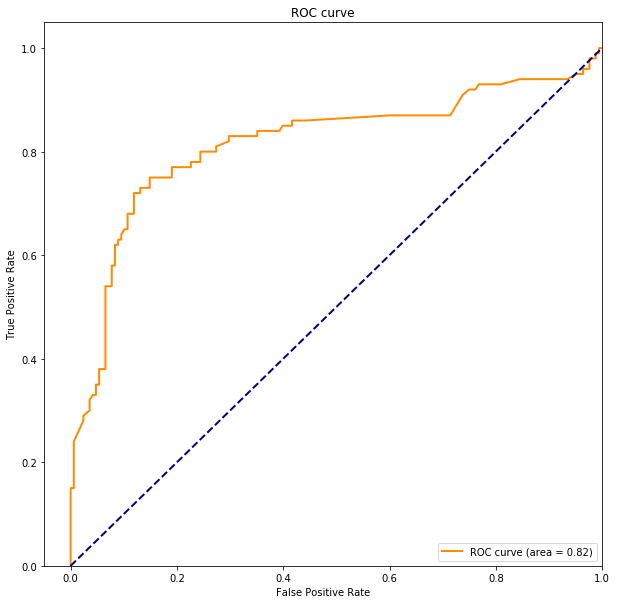

Accuracy on Training set: 0.870
Accuracy on Test set: 0.810


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data,test_size=0.3, random_state=0)


svc = SVC(probability=True)

svc.fit(X_train, y_train)

#시각화
from sklearn.metrics import roc_curve, auc

# pred_test = svc.predict(X_test) # Predict 'probability'  확률 알려준다
pred_test_proba = svc.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test_proba[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test, y_test)))